#Código poster Simposio Internacional de Estadística

# 1. Datos a nivel Colombia

In [ ]:
#Librerías
import zipfile
import requests
import pandas as pd
from io import BytesIO
from io import StringIO
import matplotlib.pyplot as plt

In [ ]:
# URL de datos de Our World in Data para Colombia
# Lo bueno de trabajar con estos datos es que no necesitamos descargarlos ni
# cargarlos a Drive PODEMOS CAMBIARLO SI QUEREMOS DANIEL Y GEORGE :D
url = "https://covid.ourworldindata.org/data/owid-covid-data.csv"
data = pd.read_csv(url)

In [ ]:
# Lectura base
data.head(5)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


In [ ]:
# Filtrar datos para Colombia
df_colombia = data[data['location'] == 'Colombia']
print(df_colombia.columns)
df_colombia.head(5)

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
74109,COL,South America,Colombia,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,13.5,65.386,1.71,77.29,0.767,51874028.0,-84.9,-1.66,-1.66,-1.666972
74110,COL,South America,Colombia,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,13.5,65.386,1.71,77.29,0.767,51874028.0,NaN,NaN,NaN,NaN
74111,COL,South America,Colombia,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,13.5,65.386,1.71,77.29,0.767,51874028.0,NaN,NaN,NaN,NaN
74112,COL,South America,Colombia,2020-01-08,NaN,0.0,NaN,NaN,0.0,NaN,...,13.5,65.386,1.71,77.29,0.767,51874028.0,NaN,NaN,NaN,NaN
74113,COL,South America,Colombia,2020-01-09,NaN,0.0,NaN,NaN,0.0,NaN,...,13.5,65.386,1.71,77.29,0.767,51874028.0,NaN,NaN,NaN,NaN


In [ ]:
df_colombia = df_colombia[['date', 'total_cases', 'new_cases', 'total_deaths', 'new_deaths', 'female_smokers', 'male_smokers']]
df_colombia['date'] = pd.to_datetime(df_colombia['date'])
df_colombia.set_index('date', inplace=True)

<ipython-input-15-7d2ab236fb0a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_colombia['date'] = pd.to_datetime(df_colombia['date'])


In [ ]:
summary_stats = df_colombia.describe()
print(summary_stats)

        total_cases      new_cases   total_deaths   new_deaths  \
count  1.583000e+03    1646.000000    1562.000000  1646.000000   
mean   4.599422e+06    3880.975699  108420.811140    86.711422   
std    2.325677e+06   19725.682540   49700.649981   434.552555   
min    1.000000e+00       0.000000       6.000000     0.000000   
25%    2.428048e+06       0.000000   67564.000000     0.000000   
50%    6.093645e+06       0.000000  139821.000000     0.000000   
75%    6.365994e+06       0.000000  142727.000000     0.000000   
max    6.388086e+06  210161.000000  142727.000000  4575.000000   

       female_smokers  male_smokers  
count    1.646000e+03        1646.0  
mean     4.700000e+00          13.5  
std      8.884483e-16           0.0  
min      4.700000e+00          13.5  
25%      4.700000e+00          13.5  
50%      4.700000e+00          13.5  
75%      4.700000e+00          13.5  
max      4.700000e+00          13.5  


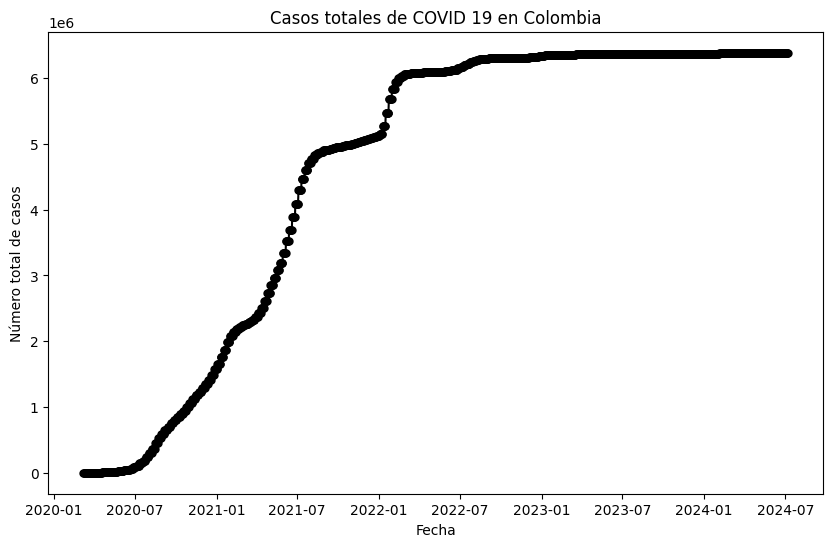

In [ ]:
#Gráfico de número de casos
plt.figure(figsize=(10, 6))
plt.plot(df_colombia.index, df_colombia['total_cases'], marker='o', color='k', linestyle='-', label='Casos totales', linewidth=1.5, markersize=5)
plt.title('Casos totales de COVID 19 en Colombia')
plt.xlabel('Fecha')
plt.ylabel('Número total de casos')
#plt.grid(True)
plt.show()

In [ ]:
# Gráfico interactivo del número de casos
fig_total_cases = px.line(df_colombia, x=df_colombia.index, y='total_cases',
                          markers=True, title='Casos totales COVID-19 en Colombia')

# Personalizar el diseño del gráfico
fig_total_cases.update_layout(
    xaxis_title='Fecha',
    yaxis_title='Número total de casos',
    showlegend=False,
    template='plotly_dark'
)
fig_total_cases.show()

NameError: name 'px' is not defined

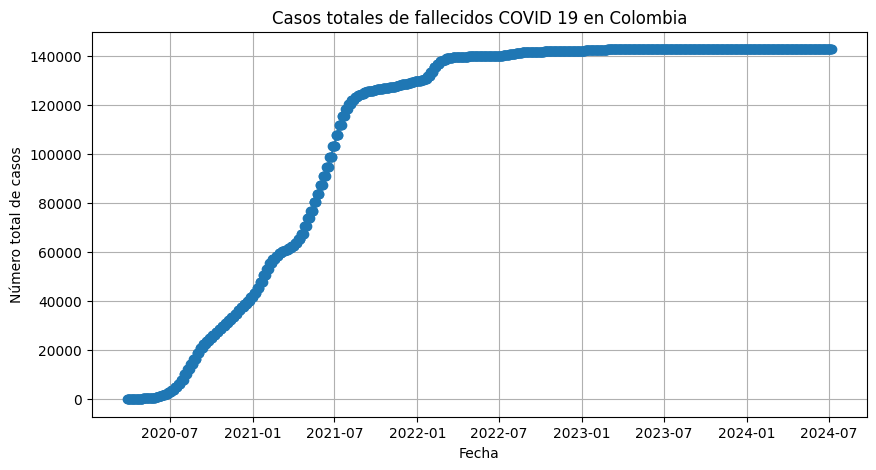

In [ ]:
#Gráfico de número de casos de fallecidos
plt.figure(figsize=(10, 5))
plt.plot(df_colombia.index, df_colombia['total_deaths'], marker='o', linestyle='-')
plt.title('Casos totales de fallecidos COVID 19 en Colombia')
plt.xlabel('Fecha')
plt.ylabel('Número total de casos')
plt.grid(True)
plt.show()

In [ ]:
# Ordenar de fechas
df_colombia['date'] = pd.to_datetime(df_colombia['date'])
df_colombia = df_colombia.sort_values(by='date')

# Crear gráfico interactivo con Plotly Express
fig_total_deaths = px.line(df_colombia, x='date', y='total_deaths',
                           title='Casos totales de fallecidos COVID-19 en Colombia',
                           labels={'date': 'Fecha', 'total_deaths': 'Número total de casos'},
                           hover_name=df_colombia['date'].dt.strftime('%d-%b-%Y'))
fig_total_deaths.update_layout(xaxis_title='Fecha', yaxis_title='Número total de casos',
                               showlegend=False, hovermode='x unified')

fig_total_deaths.show()

KeyError: 'date'

In [ ]:
# Variable asociada al género
df_smokers = data[['female_smokers', 'male_smokers']].dropna()

In [ ]:
# Gráfico de dispersión
fig_smokers = px.scatter(df_smokers, x='female_smokers', y='male_smokers',
                         labels={'female_smokers': 'Proporción de fumadoras (%)',
                                 'male_smokers': 'Proporción de fumadores (%)'},
                         title='Comparación de proporción de fumadores entre hombres y mujeres en Colombia',
                         hover_name=df_smokers.index)
fig_smokers.show()

NameError: name 'px' is not defined

# 2. Datos a nivel Bogotá

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [ ]:
url = "https://www.datos.gov.co/resource/gt2j-8ykr.csv?$limit=100000" ## Solo trae los primeros 1000 datos
#url = "https://www.datos.gov.co/resource/gt2j-8ykr.csv" ## Solo trae los primeros 1000 datos
df_bog = pd.read_csv(url)
print(f"Hay {len(df_bog)} filas en los datos")
df_bog.tail(5)

Hay 100000 filas en los datos


,fecha_reporte_web,id_de_caso,fecha_de_notificaci_n,departamento,departamento_nom,ciudad_municipio,ciudad_municipio_nom,edad,unidad_medida,sexo,...,pais_viajo_1_cod,pais_viajo_1_nom,recuperado,fecha_inicio_sintomas,fecha_muerte,fecha_diagnostico,fecha_recuperado,tipo_recuperacion,per_etn_,nom_grupo_
99995,2020-08-13 00:00:00,427521,2020-07-30 00:00:00,41,HUILA,41001,NEIVA,19,1,M,...,NaN,NaN,Recuperado,2020-07-29 00:00:00,NaN,2020-08-12 00:00:00,2020-08-24 00:00:00,Tiempo,6,NaN
99996,2020-08-13 00:00:00,427522,2020-08-01 00:00:00,41,HUILA,41001,NEIVA,27,1,F,...,NaN,NaN,Recuperado,2020-07-29 00:00:00,NaN,2020-08-12 00:00:00,2020-08-24 00:00:00,Tiempo,6,NaN
99997,2020-12-14 00:00:00,1434503,2020-11-26 00:00:00,66,RISARALDA,66001,PEREIRA,31,1,F,...,NaN,NaN,Recuperado,2020-11-23 00:00:00,NaN,2020-12-07 00:00:00,2020-12-16 00:00:00,Tiempo,6,NaN
99998,2020-12-14 00:00:00,1434504,2020-11-28 00:00:00,20,CESAR,20001,VALLEDUPAR,32,1,F,...,NaN,NaN,Recuperado,2020-11-24 00:00:00,NaN,2020-12-09 00:00:00,2020-12-16 00:00:00,Tiempo,6,NaN
99999,2020-12-14 00:00:00,1434505,2020-11-28 00:00:00,13001,CARTAGENA,13001,CARTAGENA,34,1,F,...,NaN,NaN,Recuperado,2020-11-25 00:00:00,NaN,2020-12-09 00:00:00,2020-12-16 00:00:00,Tiempo,6,NaN


In [ ]:
## Agrupacion de enfermos por dia
for fecha in ("fecha_inicio_sintomas", "fecha_diagnostico", "fecha_recuperado", "fecha_muerte"):
    df_bog[fecha] = df_bog[fecha].astype("datetime64[ns]")
    df_bog[fecha] = pd.to_datetime(df_bog[fecha], format='%Y-%m-%d')

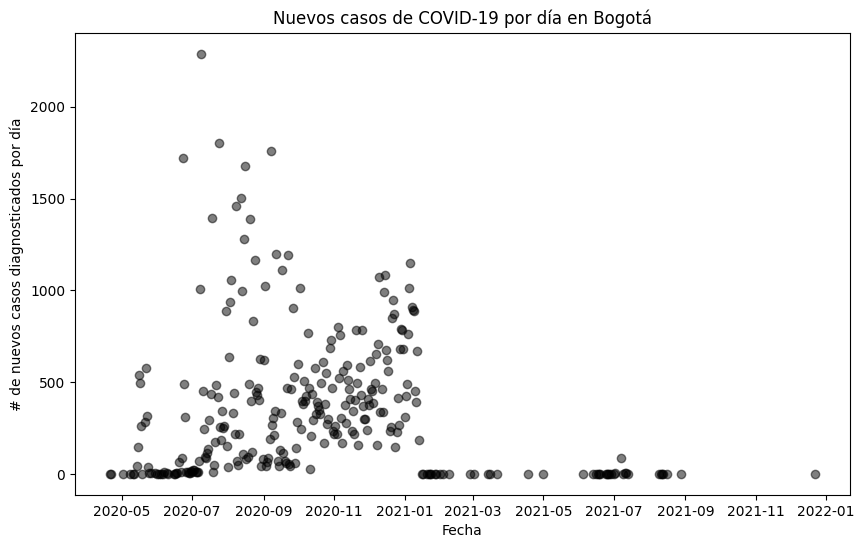

In [ ]:
event_counts = df_bog.groupby("fecha_diagnostico").size()

# Plot the data
plt.figure(figsize=(10, 6)) # Adjust the figure size as needed
plt.scatter(event_counts.index, event_counts.values, marker='o', color="k", alpha=0.5)
plt.title("Nuevos casos de COVID-19 por día en Bogotá")
plt.ylabel("# de nuevos casos diagnosticados por día")
plt.xlabel("Fecha")
plt.show()

In [ ]:
## Para los datos que no tiene reportado fecha de inicio de sintomas, o fecha de diagnostico
## En estos casos, tomar la fecha de diagnóstico como fecha de inicio de sintomas
df_bog['fecha_inicio_sintomas'] = df_bog['fecha_inicio_sintomas'].combine_first(df_bog['fecha_diagnostico'])
print(f"Si no hay fecha de inicio de sintomas, se toma igual a la fecha de diagnostico")

df_bog['fecha_diagnostico'] = df_bog['fecha_diagnostico'].combine_first(df_bog['fecha_inicio_sintomas'])
print(f"Si no hay fecha de diagnostico, se toma igual a la fecha de inicio de sintomas")


df_bog = df_bog.dropna(subset=['fecha_inicio_sintomas'])
df_bog.reset_index(inplace=True)
print(f"Si no hay ninguna de estas dos fechas, quitar el dato")

## Tiempo promedio entre fecha de inicio de sintomas y de consulta medica
timedeltas = [df_bog.loc[i, "fecha_diagnostico"] - df_bog.loc[i, "fecha_inicio_sintomas"] for i in range(1, len(df_bog))]

for ii in range(len(timedeltas)):
    timedeltas[ii] = timedeltas[ii].days

timedeltas = np.array(timedeltas, dtype=np.int32)

average_timedelta = sum(timedeltas) / len(timedeltas)
print(f"Tiempo promedio entre inicio de sintomas y diagnóstico: {average_timedelta} dias")

Si no hay fecha de inicio de sintomas, se toma igual a la fecha de diagnostico
Si no hay fecha de diagnostico, se toma igual a la fecha de inicio de sintomas
Si no hay ninguna de estas dos fechas, quitar el dato
Tiempo promedio entre inicio de sintomas y diagnóstico: 8.8544152505926 dias


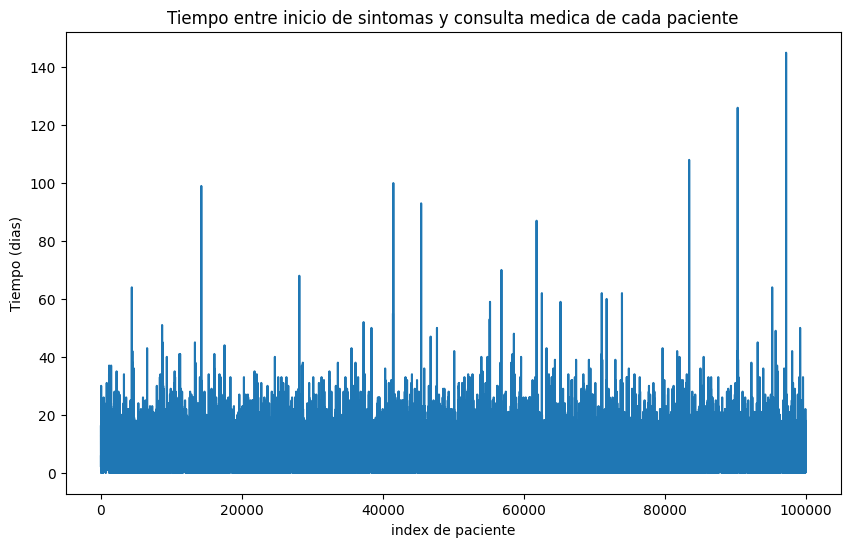

In [ ]:
plt.figure(figsize=(10, 6)) # Adjust the figure size as needed
plt.plot(range(len(timedeltas)), timedeltas)
plt.title("Tiempo entre inicio de sintomas y consulta medica de cada paciente")
plt.ylabel("Tiempo (dias)")
plt.xlabel("index de paciente")
plt.show()

In [ ]:
### Estimacion de serie de tiempo del número de enfermos por COVID

infectados = {}

start_date = min(df_bog["fecha_inicio_sintomas"]) - datetime.timedelta(days=8)
end_date = max(df_bog["fecha_diagnostico"]) + datetime.timedelta(days=int(average_timedelta) + 1)

delta = end_date - start_date   # returns timedelta

for i in range(delta.days + 1):
    day = start_date + datetime.timedelta(days=i)
    infectados[day] = 0


for ii in range (len(df_bog)):
    fecha_original = df_bog.loc[ii, "fecha_inicio_sintomas"]
    fecha_aux = fecha_original

    ### Añadir a No. de infectados la duracion entre sintomas y consulta
    for jj in range (int(average_timedelta) + 1):
        fecha_aux += datetime.timedelta(days=1)
        infectados[fecha_aux] += 1

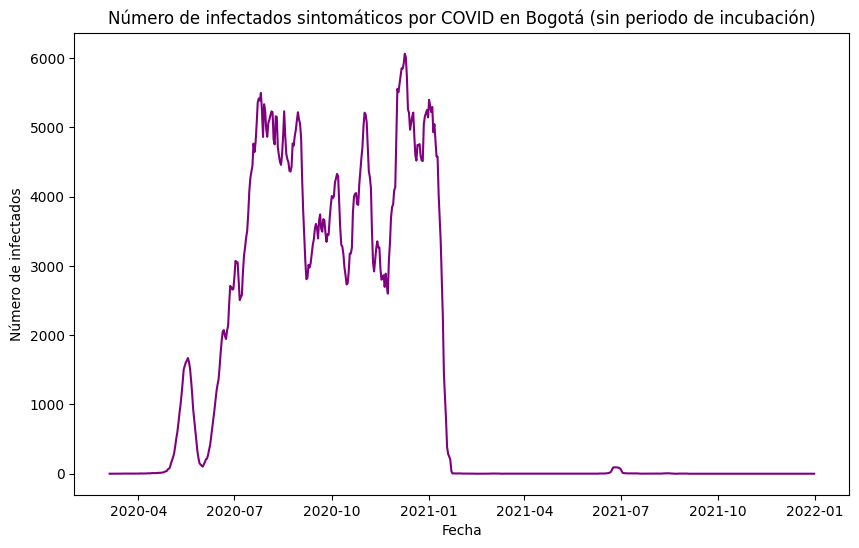

In [ ]:
plt.figure(figsize=(10, 6)) # Adjust the figure size as needed
plt.plot(infectados.keys(), infectados.values(), color="purple")
plt.title("Número de infectados sintomáticos por COVID en Bogotá (sin periodo de incubación)")
plt.ylabel("Número de infectados")
plt.xlabel("Fecha")
plt.show()

# Carga de nuevos datos

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

# Lectura de datos
gamma_data1 = '/content/gamma_data1_1300.csv'
gamma_data2 = '/content/gamma_data2_1300.csv'
data = pd.read_csv(gamma_data1)
data_2 = pd.read_csv(gamma_data2)
print(data.head())

            x  y_real         y        yl         yh        Rt       Rtl  \
0  2020-03-13       2  2.589993  0.522164   6.421306  0.374684  0.306608   
1  2020-03-14       1  1.788268  0.194003   4.983093  0.420571  0.330574   
2  2020-03-15       5  5.259885  1.724756  11.106932  0.508584  0.372651   
3  2020-03-16       1  1.935878  0.361250   5.333552  0.606879  0.435748   
4  2020-03-17       2  2.849002  0.725165   7.128648  0.722242  0.488950   

        Rth  
0  0.453211  
1  0.529321  
2  0.684913  
3  0.851976  
4  1.073212  


In [ ]:
print(data_2.head())

            x        ex       exl        exh
0  2020-03-13  2.589983  0.522154   6.421296
1  2020-03-14  1.768272  0.172820   4.961830
2  2020-03-15  5.155132  1.625672  11.038998
3  2020-03-16  1.644984  0.080346   5.064429
4  2020-03-17  2.220206  0.085265   6.689690


# 1.300 Datos

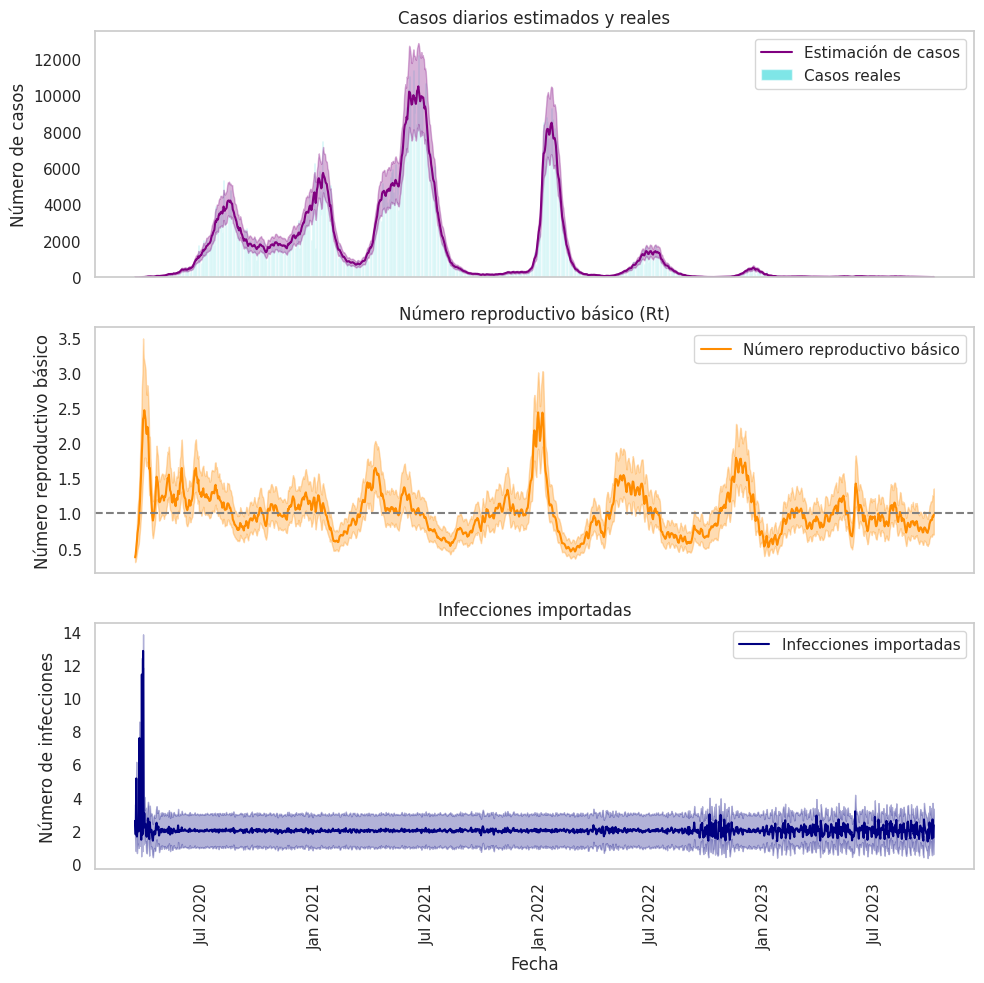

<Figure size 640x480 with 0 Axes>

In [ ]:
# Cambiar variable fecha
data['x'] = pd.to_datetime(data['x'])
data_2['x'] = pd.to_datetime(data_2['x'])
sns.set(style="whitegrid")
#darkgrid
#whitegrid
fig, axes = plt.subplots(3, 1, figsize=(10, 10), sharex=True)

# Separador miles por punto
def thousands_formatter(x, pos):
    return f'{int(x):,}'.replace(',', '.')

# Gráfica de casos diarios
axes[0].bar(data['x'], data['y_real'], color='darkturquoise', alpha=0.5, label='Casos reales')
axes[0].plot(data['x'], data['y'], color='purple', label='Estimación de casos')
axes[0].fill_between(data['x'], data['yl'], data['yh'], color='purple', alpha=0.3)
axes[0].set_title('Casos diarios estimados y reales')
axes[0].set_ylabel('Número de casos')
axes[0].legend()
#axes[0].yaxis.set_major_formatter(ticker.FuncFormatter(thousands_formatter))
axes[0].xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
axes[0].grid(False)
#axes[0].set_ylim(0, 120)

# Gráfica del número reproductivo básico
axes[1].plot(data['x'], data['Rt'], color='darkorange', label='Número reproductivo básico')
axes[1].fill_between(data['x'], data['Rtl'], data['Rth'], color='darkorange', alpha=0.3)
axes[1].axhline(1, color='grey', linestyle='--')
axes[1].set_title('Número reproductivo básico (Rt)')
axes[1].set_ylabel('Número reproductivo básico')
axes[1].legend()
#axes[1].yaxis.set_major_formatter(ticker.FuncFormatter(thousands_formatter))
axes[1].xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
axes[1].grid(False)
#axes[1].set_yscale('log')


# Gráfica de infecciones importadas
axes[2].plot(data_2['x'], data_2['ex'], color='navy', label='Infecciones importadas')
axes[2].fill_between(data_2['x'], data_2['ex'] - 1, data_2['ex'] + 1, color='navy', alpha=0.3)
axes[2].set_title('Infecciones importadas')
axes[2].set_ylabel('Número de infecciones')
axes[2].set_xlabel('Fecha')
axes[2].legend()
#axes[2].yaxis.set_major_formatter(ticker.FuncFormatter(thousands_formatter))
axes[2].xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
axes[2].grid(False)


# Ajustar a escala todas las gráficas
plt.gcf().autofmt_xdate()
plt.setp(axes[2].get_xticklabels(), rotation=90, ha='center')
plt.tight_layout()
plt.show()

plt.savefig('Figura1.pdf') # Para que en LaTeX se vea en buena calidad
plt.savefig('Figura1.svg') # Imagen vectorizada, para editar y hacer cambios menores. Se puede editar con Inkscape

# Datos 180

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

# Lectura de datos
gamma_data3 = '/content/gamma_data1_180.csv'
gamma_data4 = '/content/gamma_data2_180.csv'
data_3 = pd.read_csv(gamma_data3)
data_4 = pd.read_csv(gamma_data4)
print(data_3.head())
print(data_4.head())

            x  y_real         y        yl        yh        Rt       Rtl  \
0  2020-03-13       2  2.362888  0.437273  6.231433  0.372290  0.302043   
1  2020-03-14       1  1.601017  0.236267  4.548426  0.402658  0.288640   
2  2020-03-15       5  4.457519  1.482075  9.247853  0.513286  0.335892   
3  2020-03-16       1  1.891249  0.496509  4.931733  0.626159  0.387448   
4  2020-03-17       2  2.957440  1.000677  7.274981  0.755783  0.460420   

        Rth  
0  0.455114  
1  0.551608  
2  0.759430  
3  0.987051  
4  1.257464  
            x        ex       exl       exh
0  2020-03-13  2.362878  0.437263  6.231423
1  2020-03-14  1.529501  0.169798  4.398836
2  2020-03-15  4.133922  1.098260  8.955804
3  2020-03-16  1.288000  0.051487  4.399966
4  2020-03-17  1.801471  0.054129  6.258309


Las siguientes 3 celdas de código son con las que se generan las gráficas corregidas del póster,

In [ ]:
ylabel_font = 17
title_font = 19
legend_font = 15
ticks_font = 16

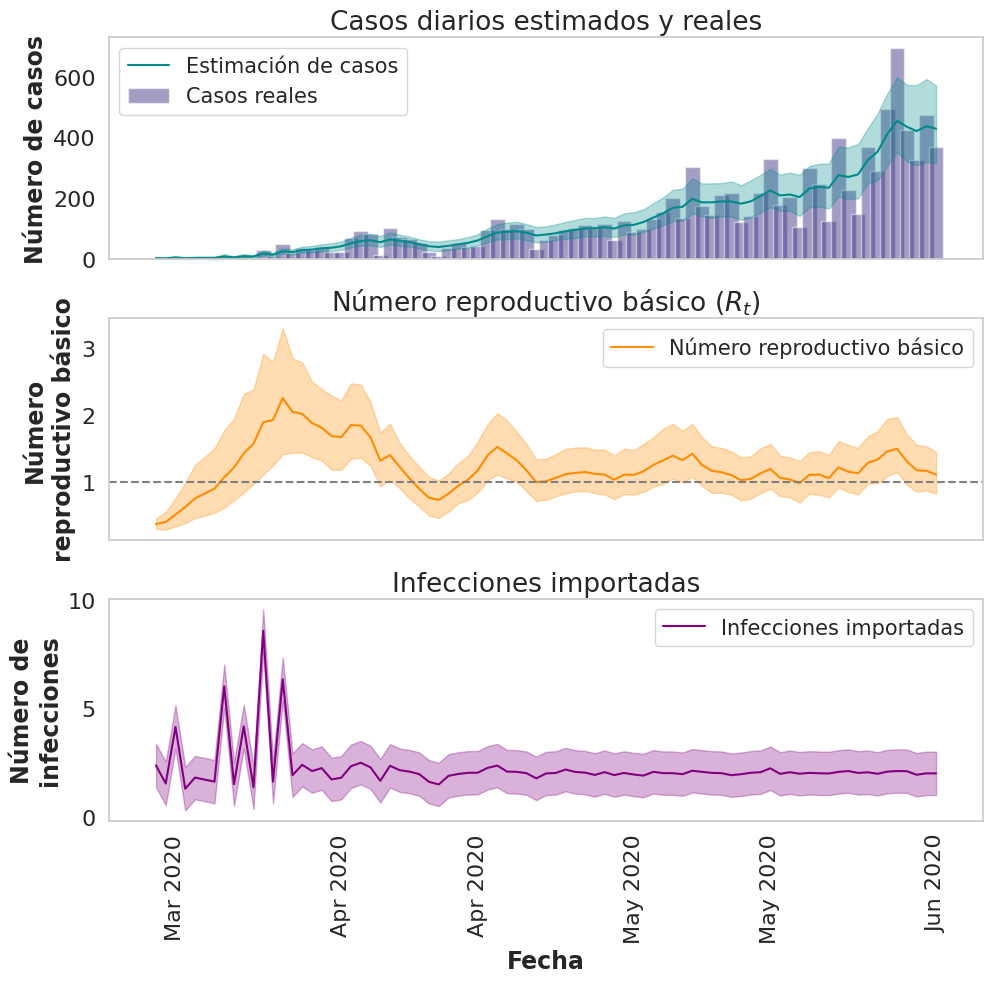

In [ ]:
# Convertir las variables de fecha a datetime
data_3['x'] = pd.to_datetime(data_3['x'])
data_4['x'] = pd.to_datetime(data_4['x'])
sns.set(style="whitegrid")

data_3 = data_3[data_3['x'] <= '2020-06-01']
data_4 = data_4[data_4['x'] <= '2020-06-01']

# Configuración de la figura y los ejes
fig, axes = plt.subplots(3, 1, figsize=(10, 10), sharex=True)

# Función para formatear los miles con punto
def thousands_formatter(x, pos):
    return f'{int(x):,}'.replace(',', '.')

#DarkSlateBlue

# Gráfica de casos diarios con ajuste del ancho de las barras
axes[0].bar(data_3['x'], data_3['y_real'], color='DarkSlateBlue', alpha=0.5, width=1.5, label='Casos reales')
axes[0].plot(data_3['x'], data_3['y'], color='DarkCyan', label='Estimación de casos')
axes[0].fill_between(data_3['x'], data_3['yl'], data_3['yh'], color='DarkCyan', alpha=0.3)
axes[0].set_title('Casos diarios estimados y reales', fontsize=title_font)
axes[0].set_ylabel('Número de casos', fontsize=ylabel_font, fontweight='bold')
axes[0].legend(fontsize=legend_font)
# axes[0].yaxis.set_major_formatter(ticker.FuncFormatter(thousands_formatter))
axes[0].xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
axes[0].grid(False)

# Gráfica del número reproductivo básico
axes[1].plot(data_3['x'], data_3['Rt'], color='darkorange', label='Número reproductivo básico')
axes[1].fill_between(data_3['x'], data_3['Rtl'], data_3['Rth'], color='darkorange', alpha=0.3)
axes[1].axhline(1, color='grey', linestyle='--')
axes[1].set_title('Número reproductivo básico ($R_t$)', fontsize=title_font)
axes[1].set_ylabel('Número\nreproductivo básico', fontsize=ylabel_font, fontweight='bold')
axes[1].legend(fontsize=legend_font)
# axes[1].yaxis.set_major_formatter(ticker.FuncFormatter(thousands_formatter))
axes[1].xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
axes[1].grid(False)

# Gráfica de infecciones importadas
axes[2].plot(data_4['x'], data_4['ex'], color='purple', label='Infecciones importadas')
axes[2].fill_between(data_4['x'], data_4['ex'] - 1, data_4['ex'] + 1, color='purple', alpha=0.3)
axes[2].set_title('Infecciones importadas', fontsize=title_font)
axes[2].set_ylabel('Número de\ninfecciones', fontsize=ylabel_font, fontweight='bold')
axes[2].set_xlabel('Fecha', fontsize=ylabel_font, fontweight='bold')
axes[2].legend(fontsize=legend_font)
# axes[2].yaxis.set_major_formatter(ticker.FuncFormatter(thousands_formatter))
axes[2].xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
axes[2].grid(False)


# Ajustar a escala todas las gráficas
plt.gcf().autofmt_xdate()
plt.setp(axes[2].get_xticklabels(), rotation=90, ha='center', fontsize=ticks_font)
plt.tight_layout()


for ii in range (3):
    axes[ii].tick_params(axis='both', which='major', labelsize=ticks_font)

# Guardar las figuras en diferentes formatos
plt.savefig('Figura1.pdf') # Para que en LaTeX se vea en buena calidad
plt.savefig('Figura1.svg') # Imagen vectorizada, para editar y hacer cambios menores. Se puede editar con Inkscape



plt.show()

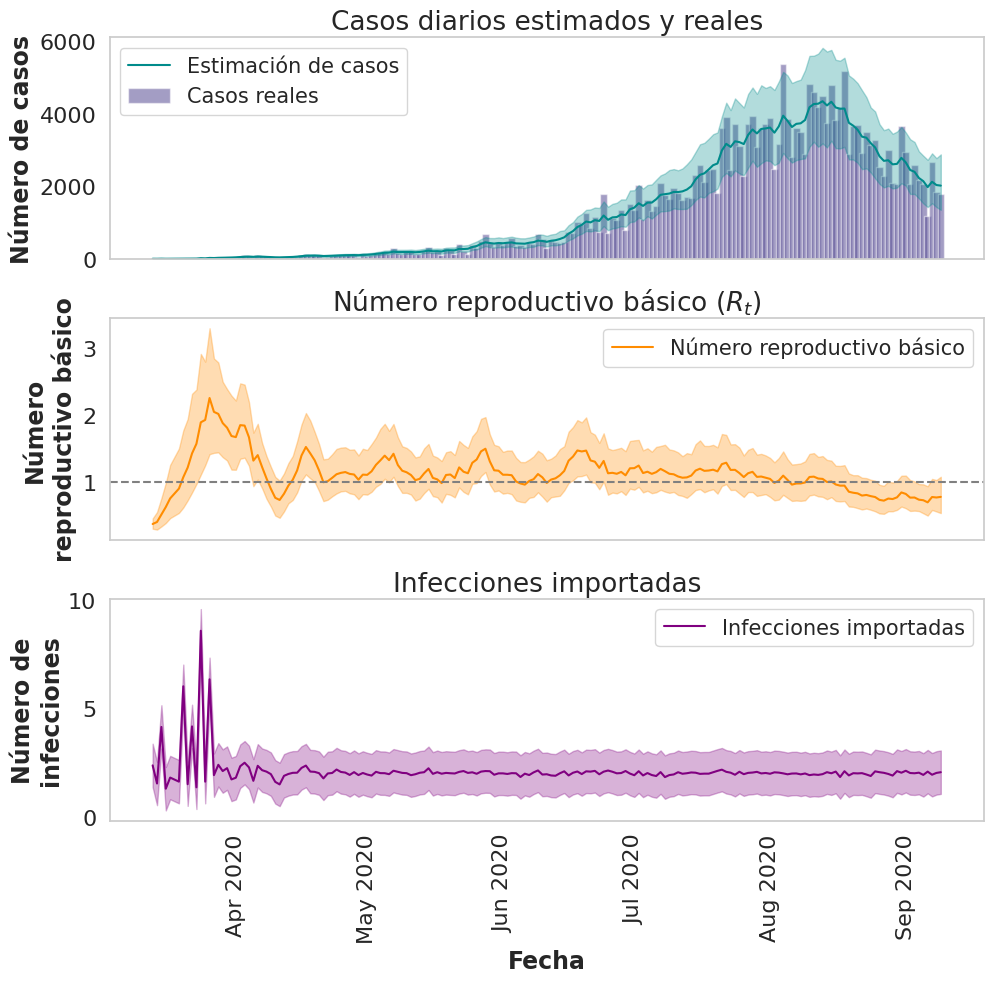

In [ ]:
# Convertir las variables de fecha a datetime
data_3['x'] = pd.to_datetime(data_3['x'])
data_4['x'] = pd.to_datetime(data_4['x'])
sns.set(style="whitegrid")

# Configuración de la figura y los ejes
fig, axes = plt.subplots(3, 1, figsize=(10, 10), sharex=True)

# Función para formatear los miles con punto
def thousands_formatter(x, pos):
    return f'{int(x):,}'.replace(',', '.')

#DarkSlateBlue

# Gráfica de casos diarios con ajuste del ancho de las barras
axes[0].bar(data_3['x'], data_3['y_real'], color='DarkSlateBlue', alpha=0.5, width=1.5, label='Casos reales')
axes[0].plot(data_3['x'], data_3['y'], color='DarkCyan', label='Estimación de casos')
axes[0].fill_between(data_3['x'], data_3['yl'], data_3['yh'], color='DarkCyan', alpha=0.3)
axes[0].set_title('Casos diarios estimados y reales', fontsize=title_font)
axes[0].set_ylabel('Número de casos', fontsize=ylabel_font, fontweight='bold')
axes[0].legend(fontsize=legend_font)
# axes[0].yaxis.set_major_formatter(ticker.FuncFormatter(thousands_formatter))
axes[0].xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
axes[0].grid(False)

# Gráfica del número reproductivo básico
axes[1].plot(data_3['x'], data_3['Rt'], color='darkorange', label='Número reproductivo básico')
axes[1].fill_between(data_3['x'], data_3['Rtl'], data_3['Rth'], color='darkorange', alpha=0.3)
axes[1].axhline(1, color='grey', linestyle='--')
axes[1].set_title('Número reproductivo básico ($R_t$)', fontsize=title_font)
axes[1].set_ylabel('Número\nreproductivo básico', fontsize=ylabel_font, fontweight='bold')
axes[1].legend(fontsize=legend_font)
# axes[1].yaxis.set_major_formatter(ticker.FuncFormatter(thousands_formatter))
axes[1].xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
axes[1].grid(False)

# Gráfica de infecciones importadas
axes[2].plot(data_4['x'], data_4['ex'], color='purple', label='Infecciones importadas')
axes[2].fill_between(data_4['x'], data_4['ex'] - 1, data_4['ex'] + 1, color='purple', alpha=0.3)
axes[2].set_title('Infecciones importadas', fontsize=title_font)
axes[2].set_ylabel('Número de\ninfecciones', fontsize=ylabel_font, fontweight='bold')
axes[2].set_xlabel('Fecha', fontsize=ylabel_font, fontweight='bold')
axes[2].legend(fontsize=legend_font)
# axes[2].yaxis.set_major_formatter(ticker.FuncFormatter(thousands_formatter))
axes[2].xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
axes[2].grid(False)


# Ajustar a escala todas las gráficas
plt.gcf().autofmt_xdate()
plt.setp(axes[2].get_xticklabels(), rotation=90, ha='center', fontsize=ticks_font)
plt.tight_layout()


for ii in range (3):
    axes[ii].tick_params(axis='both', which='major', labelsize=ticks_font)

# Guardar las figuras en diferentes formatos
plt.savefig('Figura1.pdf') # Para que en LaTeX se vea en buena calidad
plt.savefig('Figura1.svg') # Imagen vectorizada, para editar y hacer cambios menores. Se puede editar con Inkscape



plt.show()

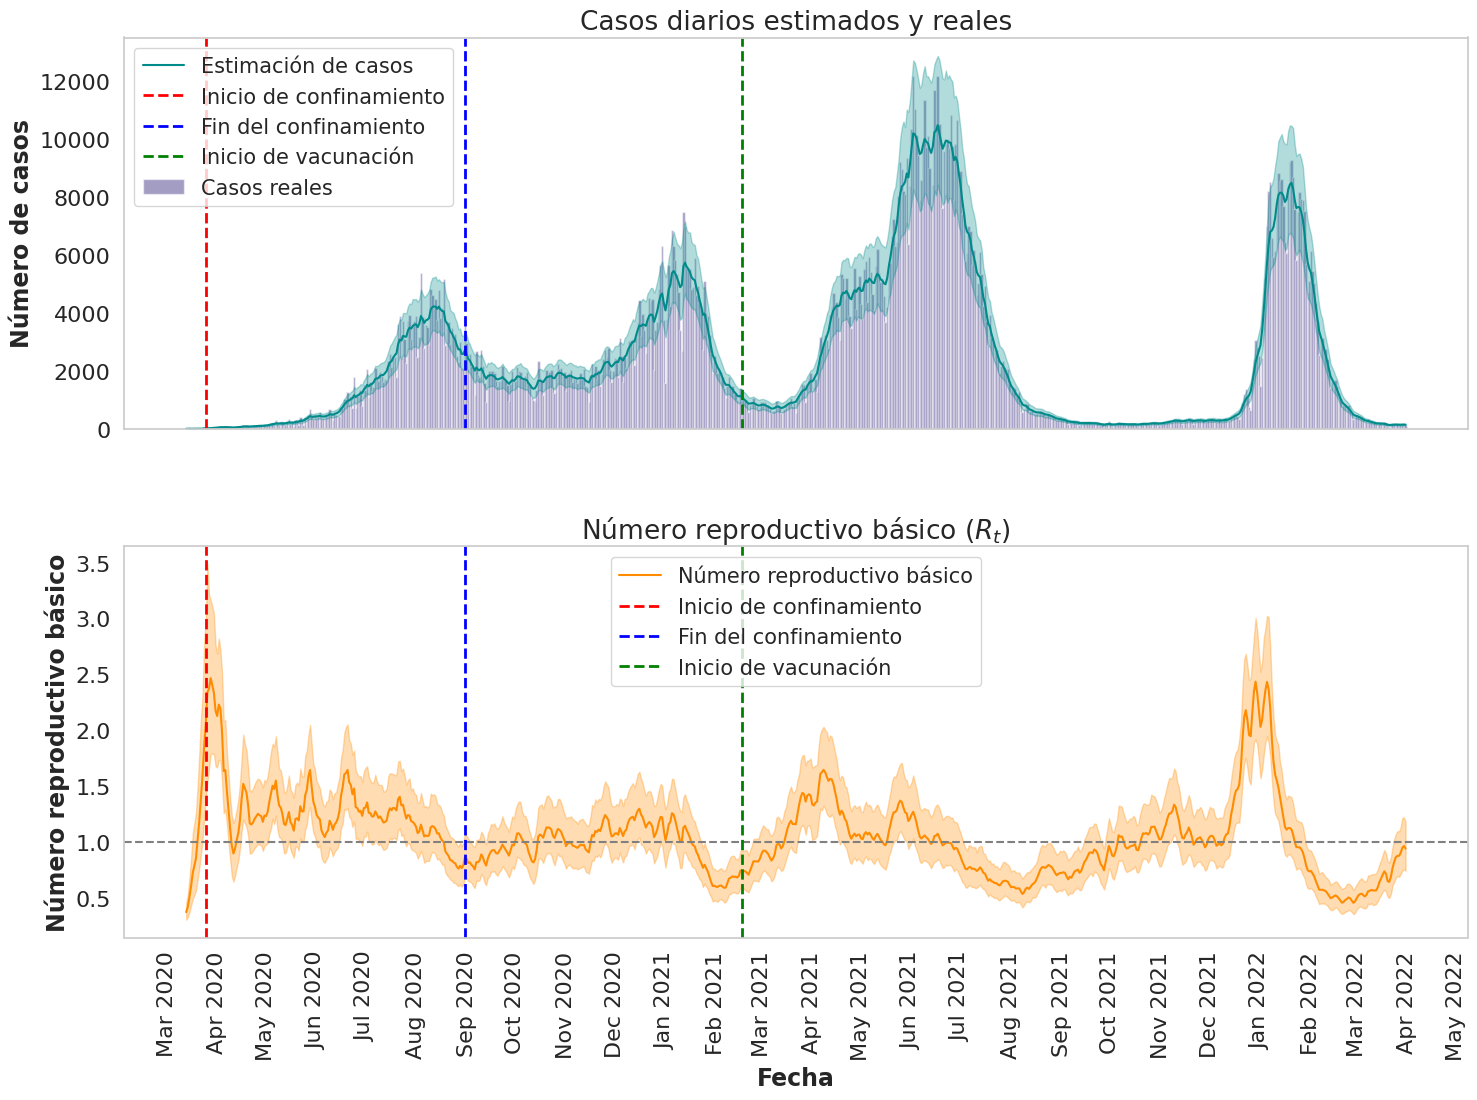

In [ ]:
# Cambiar variable fecha
data['x'] = pd.to_datetime(data['x'])

# Filtrar datos hasta marzo de 2022
data = data[data['x'] <= '2022-03-31']

# Configurar el estilo de Seaborn
sns.set(style="whitegrid")

# Crear la figura y los ejes con un tamaño adecuado
fig, axes = plt.subplots(2, 1, figsize=(16, 12), sharex=True)

# Fechas de eventos importantes
event_dates = {
    'Inicio de confinamiento': pd.to_datetime('2020-03-25'),
    'Fin del confinamiento': pd.to_datetime('2020-08-31'),
    'Inicio de vacunación': pd.to_datetime('2021-02-17')
}
event_colors = {
    'Inicio de confinamiento': 'red',
    'Fin del confinamiento': 'blue',
    'Inicio de vacunación': 'green'
}


# Gráfica de casos diarios
axes[0].bar(data['x'], data['y_real'], color='DarkSlateBlue', alpha=0.5, width=1.5, label='Casos reales')
axes[0].plot(data['x'], data['y'], color='DarkCyan', label='Estimación de casos')
axes[0].fill_between(data['x'], data['yl'], data['yh'], color='DarkCyan', alpha=0.3)




# Añadir líneas punteadas y anotaciones para eventos importantes
for label, date in event_dates.items():
    color = event_colors[label]
    axes[0].axvline(date, color=color, linestyle='--', linewidth=2, label=label)




axes[0].set_title('Casos diarios estimados y reales', fontsize=title_font)
axes[0].set_ylabel('Número de casos', fontsize=ylabel_font, fontweight='bold')
axes[0].legend(fontsize=legend_font)
axes[0].xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
axes[0].xaxis.set_major_locator(mdates.MonthLocator())
axes[0].grid(False)


# Gráfica del número reproductivo básico
axes[1].plot(data['x'], data['Rt'], color='darkorange', label='Número reproductivo básico')
axes[1].fill_between(data['x'], data['Rtl'], data['Rth'], color='darkorange', alpha=0.3)
axes[1].axhline(1, color='grey', linestyle='--')


# Añadir líneas punteadas y anotaciones para eventos importantes
for label, date in event_dates.items():
    color = event_colors[label]
    axes[1].axvline(date, color=color, linestyle='--', linewidth=2, label=label)



axes[1].set_title('Número reproductivo básico ($R_t$)', fontsize=title_font)
axes[1].set_ylabel('Número reproductivo básico', fontsize=ylabel_font, fontweight='bold')
axes[1].set_xlabel('Fecha', fontsize=ylabel_font, weight='bold')
axes[1].legend(fontsize=legend_font)
axes[1].xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
axes[1].xaxis.set_major_locator(mdates.MonthLocator())
axes[1].grid(False)




for ii in range (2):
    axes[ii].tick_params(axis='both', which='major', labelsize=ticks_font)


# Ajustar espaciado manualmente para evitar que el diseño se corte
plt.subplots_adjust(left=0.08, right=0.92, top=0.95, bottom=0.1, hspace=0.3)

# Ajustar a escala todas las gráficas
plt.gcf().autofmt_xdate()
plt.setp(axes[1].get_xticklabels(), rotation=90, ha='center', fontsize=ticks_font)

plt.savefig("Figura2.pdf")

# Mostrar figura
plt.show()


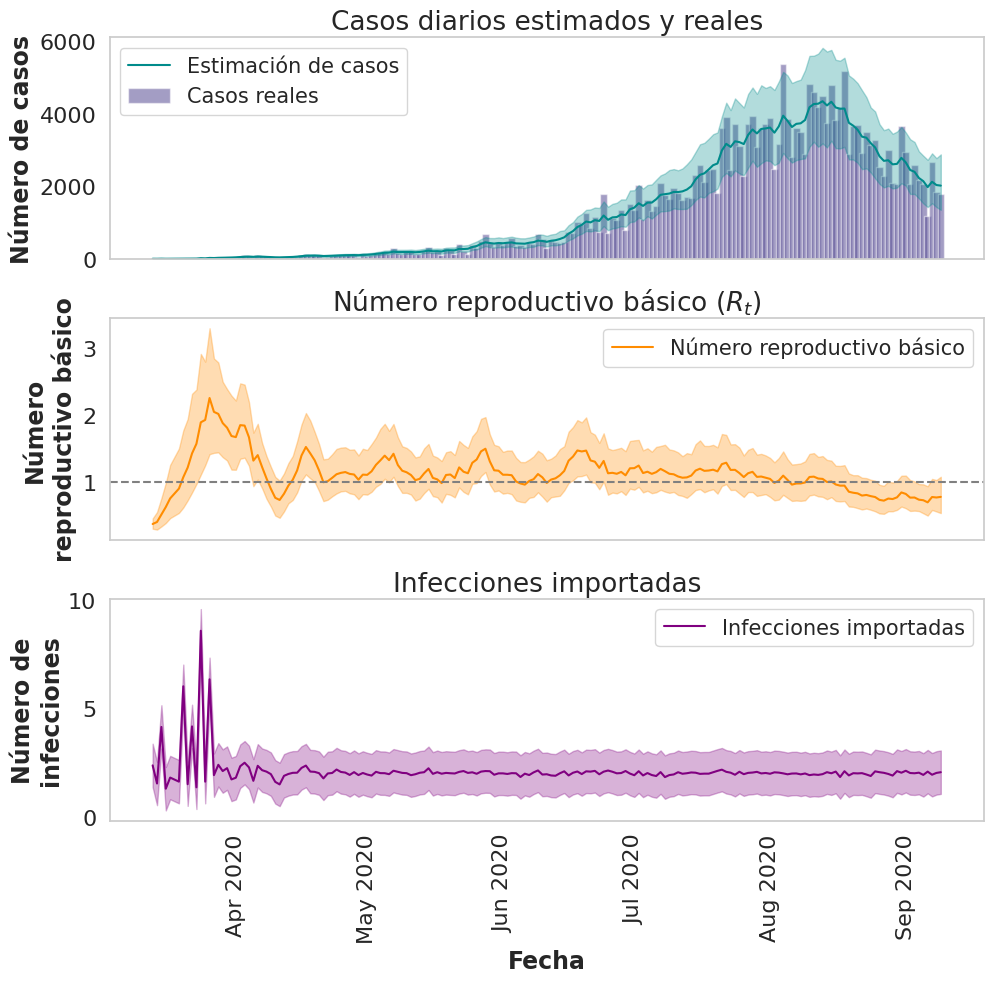

In [ ]:
# Convertir las variables de fecha a datetime
data_3['x'] = pd.to_datetime(data_3['x'])
data_4['x'] = pd.to_datetime(data_4['x'])
sns.set(style="whitegrid")

# Configuración de la figura y los ejes
fig, axes = plt.subplots(3, 1, figsize=(10, 10), sharex=True)

# Función para formatear los miles con punto
def thousands_formatter(x, pos):
    return f'{int(x):,}'.replace(',', '.')

#DarkSlateBlue

# Gráfica de casos diarios con ajuste del ancho de las barras
axes[0].bar(data_3['x'], data_3['y_real'], color='DarkSlateBlue', alpha=0.5, width=1.5, label='Casos reales')
axes[0].plot(data_3['x'], data_3['y'], color='DarkCyan', label='Estimación de casos')
axes[0].fill_between(data_3['x'], data_3['yl'], data_3['yh'], color='DarkCyan', alpha=0.3)
axes[0].set_title('Casos diarios estimados y reales', fontsize=title_font)
axes[0].set_ylabel('Número de casos', fontsize=ylabel_font, fontweight='bold')
axes[0].legend(fontsize=legend_font)
# axes[0].yaxis.set_major_formatter(ticker.FuncFormatter(thousands_formatter))
axes[0].xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
axes[0].grid(False)

# Gráfica del número reproductivo básico
axes[1].plot(data_3['x'], data_3['Rt'], color='darkorange', label='Número reproductivo básico')
axes[1].fill_between(data_3['x'], data_3['Rtl'], data_3['Rth'], color='darkorange', alpha=0.3)
axes[1].axhline(1, color='grey', linestyle='--')
axes[1].set_title('Número reproductivo básico ($R_t$)', fontsize=title_font)
axes[1].set_ylabel('Número\nreproductivo básico', fontsize=ylabel_font, fontweight='bold')
axes[1].legend(fontsize=legend_font)
# axes[1].yaxis.set_major_formatter(ticker.FuncFormatter(thousands_formatter))
axes[1].xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
axes[1].grid(False)

# Gráfica de infecciones importadas
axes[2].plot(data_4['x'], data_4['ex'], color='purple', label='Infecciones importadas')
axes[2].fill_between(data_4['x'], data_4['ex'] - 1, data_4['ex'] + 1, color='purple', alpha=0.3)
axes[2].set_title('Infecciones importadas', fontsize=title_font)
axes[2].set_ylabel('Número de\ninfecciones', fontsize=ylabel_font, fontweight='bold')
axes[2].set_xlabel('Fecha', fontsize=ylabel_font, fontweight='bold')
axes[2].legend(fontsize=legend_font)
# axes[2].yaxis.set_major_formatter(ticker.FuncFormatter(thousands_formatter))
axes[2].xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
axes[2].grid(False)


# Ajustar a escala todas las gráficas
plt.gcf().autofmt_xdate()
plt.setp(axes[2].get_xticklabels(), rotation=90, ha='center', fontsize=ticks_font)
plt.tight_layout()


for ii in range (3):
    axes[ii].tick_params(axis='both', which='major', labelsize=ticks_font)

# Guardar las figuras en diferentes formatos
plt.savefig('Figura1.pdf') # Para que en LaTeX se vea en buena calidad
plt.savefig('Figura1.svg') # Imagen vectorizada, para editar y hacer cambios menores. Se puede editar con Inkscape



plt.show()

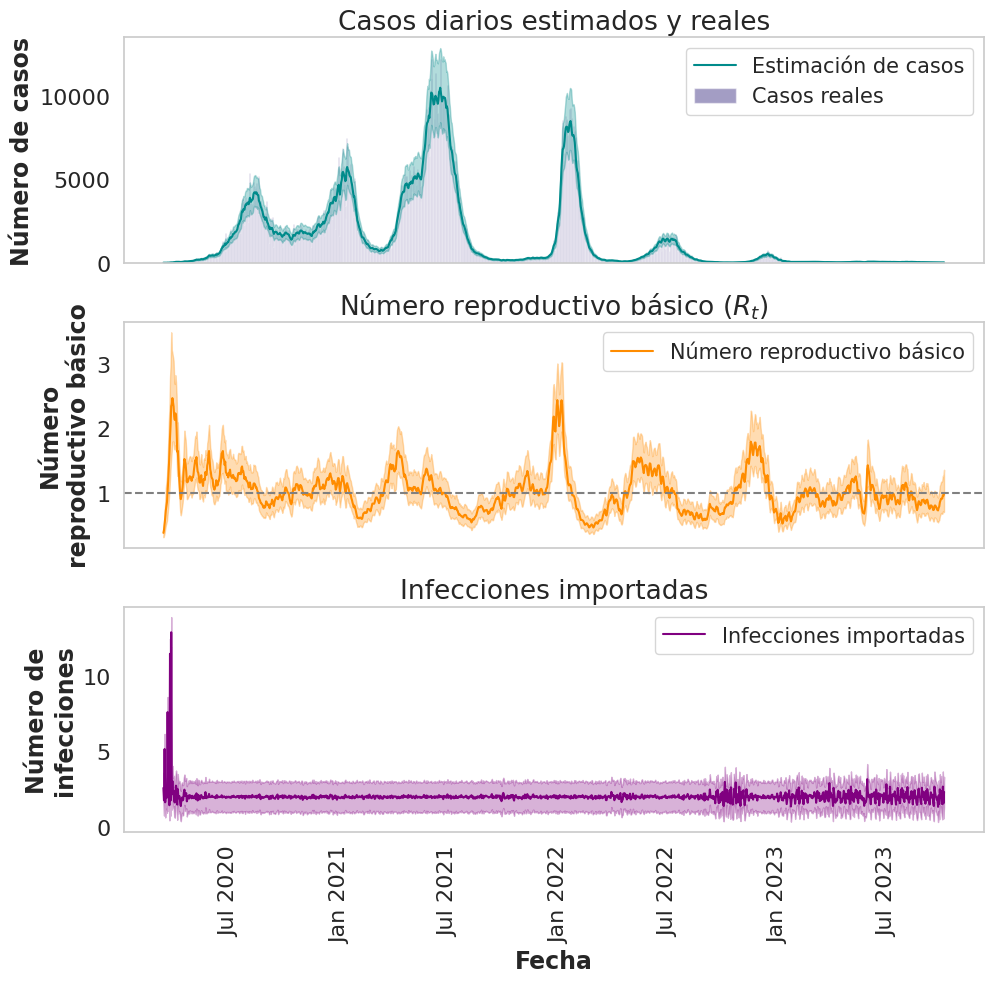

In [ ]:
# Convertir las variables de fecha a datetime
data['x'] = pd.to_datetime(data['x'])
data_2['x'] = pd.to_datetime(data_2['x'])
sns.set(style="whitegrid")

# Configuración de la figura y los ejes
fig, axes = plt.subplots(3, 1, figsize=(10, 10), sharex=True)

# Función para formatear los miles con punto
def thousands_formatter(x, pos):
    return f'{int(x):,}'.replace(',', '.')

#DarkSlateBlue

# Gráfica de casos diarios con ajuste del ancho de las barras
axes[0].bar(data['x'], data['y_real'], color='DarkSlateBlue', alpha=0.5, width=1.5, label='Casos reales')
axes[0].plot(data['x'], data['y'], color='DarkCyan', label='Estimación de casos')
axes[0].fill_between(data['x'], data['yl'], data['yh'], color='DarkCyan', alpha=0.3)
axes[0].set_title('Casos diarios estimados y reales', fontsize=title_font)
axes[0].set_ylabel('Número de casos', fontsize=ylabel_font, fontweight='bold')
axes[0].legend(fontsize=legend_font)
# axes[0].yaxis.set_major_formatter(ticker.FuncFormatter(thousands_formatter))
axes[0].xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
axes[0].grid(False)

# Gráfica del número reproductivo básico
axes[1].plot(data['x'], data['Rt'], color='darkorange', label='Número reproductivo básico')
axes[1].fill_between(data['x'], data['Rtl'], data['Rth'], color='darkorange', alpha=0.3)
axes[1].axhline(1, color='grey', linestyle='--')
axes[1].set_title('Número reproductivo básico ($R_t$)', fontsize=title_font)
axes[1].set_ylabel('Número\nreproductivo básico', fontsize=ylabel_font, fontweight='bold')
axes[1].legend(fontsize=legend_font)
# axes[1].yaxis.set_major_formatter(ticker.FuncFormatter(thousands_formatter))
axes[1].xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
axes[1].grid(False)

# Gráfica de infecciones importadas
axes[2].plot(data_2['x'], data_2['ex'], color='purple', label='Infecciones importadas')
axes[2].fill_between(data_2['x'], data_2['ex'] - 1, data_2['ex'] + 1, color='purple', alpha=0.3)
axes[2].set_title('Infecciones importadas', fontsize=title_font)
axes[2].set_ylabel('Número de\ninfecciones', fontsize=ylabel_font, fontweight='bold')
axes[2].set_xlabel('Fecha', fontsize=ylabel_font, fontweight='bold')
axes[2].legend(fontsize=legend_font)
# axes[2].yaxis.set_major_formatter(ticker.FuncFormatter(thousands_formatter))
axes[2].xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
axes[2].grid(False)


# Ajustar a escala todas las gráficas
plt.gcf().autofmt_xdate()
plt.setp(axes[2].get_xticklabels(), rotation=90, ha='center', fontsize=ticks_font)
plt.tight_layout()


for ii in range (3):
    axes[ii].tick_params(axis='both', which='major', labelsize=ticks_font)

# Guardar las figuras en diferentes formatos
plt.savefig('Figura1.pdf') # Para que en LaTeX se vea en buena calidad
plt.savefig('Figura1.svg') # Imagen vectorizada, para editar y hacer cambios menores. Se puede editar con Inkscape



plt.show()

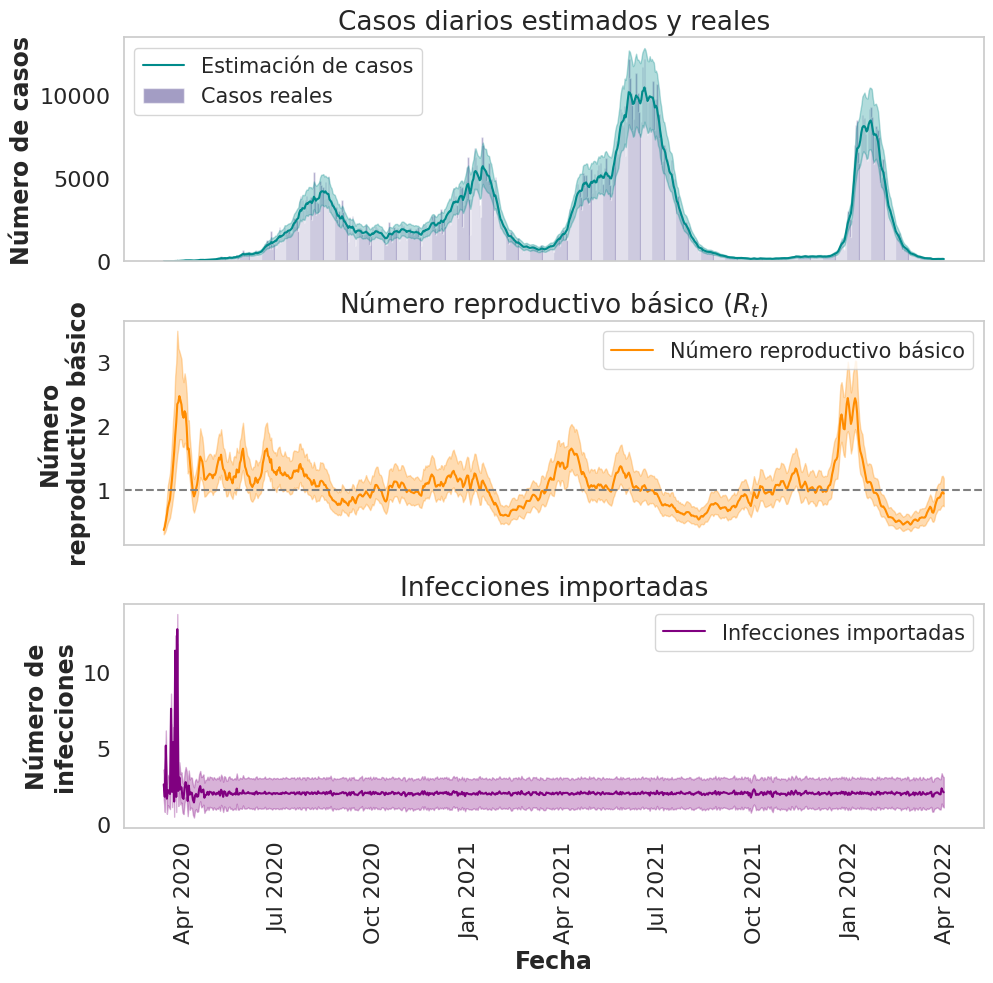

In [ ]:
# Convertir las variables de fecha a datetime
data['x'] = pd.to_datetime(data['x'])
data_2['x'] = pd.to_datetime(data_2['x'])
sns.set(style="whitegrid")

data = data[data['x'] <= '2022-03-31']
data_2 = data_2[data_2['x'] <= '2022-03-31']

# Configuración de la figura y los ejes
fig, axes = plt.subplots(3, 1, figsize=(10, 10), sharex=True)

# Función para formatear los miles con punto
def thousands_formatter(x, pos):
    return f'{int(x):,}'.replace(',', '.')

#DarkSlateBlue

# Gráfica de casos diarios con ajuste del ancho de las barras
axes[0].bar(data['x'], data['y_real'], color='DarkSlateBlue', alpha=0.5, width=1.5, label='Casos reales')
axes[0].plot(data['x'], data['y'], color='DarkCyan', label='Estimación de casos')
axes[0].fill_between(data['x'], data['yl'], data['yh'], color='DarkCyan', alpha=0.3)
axes[0].set_title('Casos diarios estimados y reales', fontsize=title_font)
axes[0].set_ylabel('Número de casos', fontsize=ylabel_font, fontweight='bold')
axes[0].legend(fontsize=legend_font)
# axes[0].yaxis.set_major_formatter(ticker.FuncFormatter(thousands_formatter))
axes[0].xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
axes[0].grid(False)

# Gráfica del número reproductivo básico
axes[1].plot(data['x'], data['Rt'], color='darkorange', label='Número reproductivo básico')
axes[1].fill_between(data['x'], data['Rtl'], data['Rth'], color='darkorange', alpha=0.3)
axes[1].axhline(1, color='grey', linestyle='--')
axes[1].set_title('Número reproductivo básico ($R_t$)', fontsize=title_font)
axes[1].set_ylabel('Número\nreproductivo básico', fontsize=ylabel_font, fontweight='bold')
axes[1].legend(fontsize=legend_font)
# axes[1].yaxis.set_major_formatter(ticker.FuncFormatter(thousands_formatter))
axes[1].xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
axes[1].grid(False)

# Gráfica de infecciones importadas
axes[2].plot(data_2['x'], data_2['ex'], color='purple', label='Infecciones importadas')
axes[2].fill_between(data_2['x'], data_2['ex'] - 1, data_2['ex'] + 1, color='purple', alpha=0.3)
axes[2].set_title('Infecciones importadas', fontsize=title_font)
axes[2].set_ylabel('Número de\ninfecciones', fontsize=ylabel_font, fontweight='bold')
axes[2].set_xlabel('Fecha', fontsize=ylabel_font, fontweight='bold')
axes[2].legend(fontsize=legend_font)
# axes[2].yaxis.set_major_formatter(ticker.FuncFormatter(thousands_formatter))
axes[2].xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
axes[2].grid(False)


# Ajustar a escala todas las gráficas
plt.gcf().autofmt_xdate()
plt.setp(axes[2].get_xticklabels(), rotation=90, ha='center', fontsize=ticks_font)
plt.tight_layout()


for ii in range (3):
    axes[ii].tick_params(axis='both', which='major', labelsize=ticks_font)

# Guardar las figuras en diferentes formatos
plt.savefig('Figura1.pdf') # Para que en LaTeX se vea en buena calidad
plt.savefig('Figura1.svg') # Imagen vectorizada, para editar y hacer cambios menores. Se puede editar con Inkscape



plt.show()

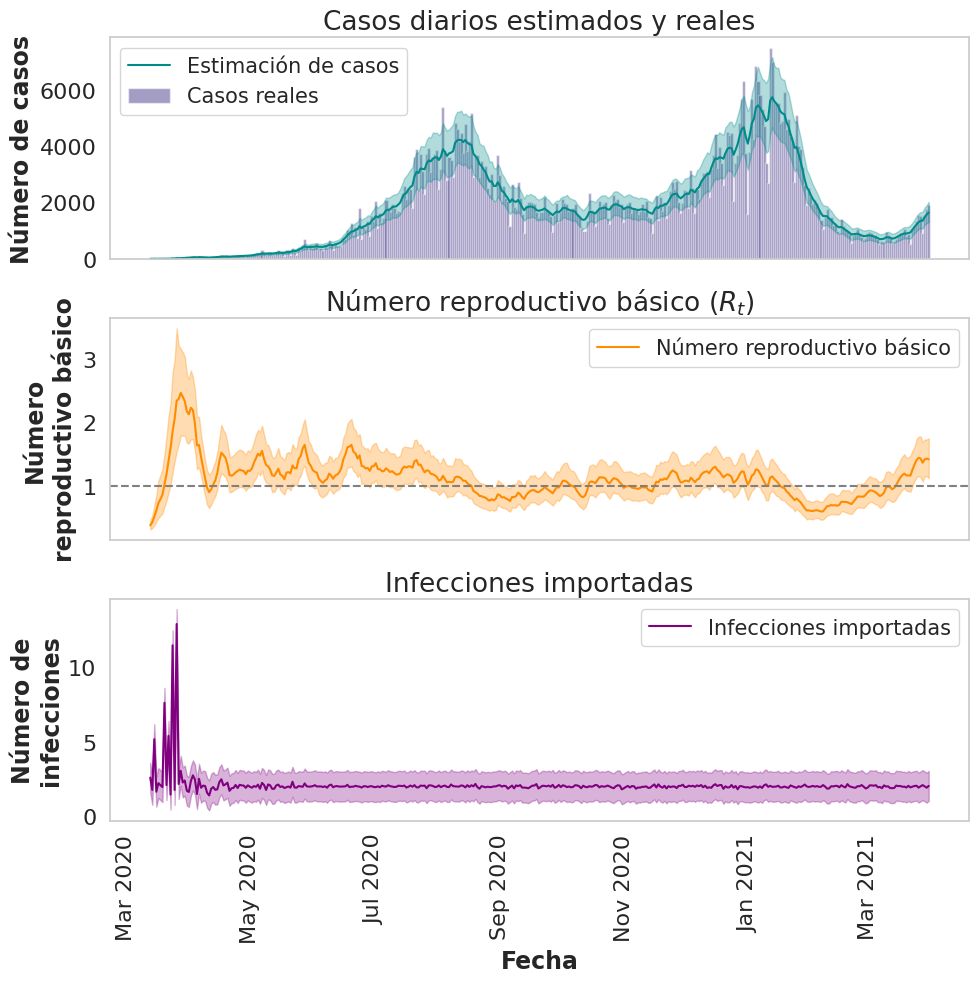

In [ ]:
# Convertir las variables de fecha a datetime
data['x'] = pd.to_datetime(data['x'])
data_2['x'] = pd.to_datetime(data_2['x'])
sns.set(style="whitegrid")

data = data[data['x'] <= '2021-03-31']
data_2 = data_2[data_2['x'] <= '2021-03-31']

# Configuración de la figura y los ejes
fig, axes = plt.subplots(3, 1, figsize=(10, 10), sharex=True)

# Función para formatear los miles con punto
def thousands_formatter(x, pos):
    return f'{int(x):,}'.replace(',', '.')

#DarkSlateBlue

# Gráfica de casos diarios con ajuste del ancho de las barras
axes[0].bar(data['x'], data['y_real'], color='DarkSlateBlue', alpha=0.5, width=1.5, label='Casos reales')
axes[0].plot(data['x'], data['y'], color='DarkCyan', label='Estimación de casos')
axes[0].fill_between(data['x'], data['yl'], data['yh'], color='DarkCyan', alpha=0.3)
axes[0].set_title('Casos diarios estimados y reales', fontsize=title_font)
axes[0].set_ylabel('Número de casos', fontsize=ylabel_font, fontweight='bold')
axes[0].legend(fontsize=legend_font)
# axes[0].yaxis.set_major_formatter(ticker.FuncFormatter(thousands_formatter))
axes[0].xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
axes[0].grid(False)

# Gráfica del número reproductivo básico
axes[1].plot(data['x'], data['Rt'], color='darkorange', label='Número reproductivo básico')
axes[1].fill_between(data['x'], data['Rtl'], data['Rth'], color='darkorange', alpha=0.3)
axes[1].axhline(1, color='grey', linestyle='--')
axes[1].set_title('Número reproductivo básico ($R_t$)', fontsize=title_font)
axes[1].set_ylabel('Número\nreproductivo básico', fontsize=ylabel_font, fontweight='bold')
axes[1].legend(fontsize=legend_font)
# axes[1].yaxis.set_major_formatter(ticker.FuncFormatter(thousands_formatter))
axes[1].xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
axes[1].grid(False)

# Gráfica de infecciones importadas
axes[2].plot(data_2['x'], data_2['ex'], color='purple', label='Infecciones importadas')
axes[2].fill_between(data_2['x'], data_2['ex'] - 1, data_2['ex'] + 1, color='purple', alpha=0.3)
axes[2].set_title('Infecciones importadas', fontsize=title_font)
axes[2].set_ylabel('Número de\ninfecciones', fontsize=ylabel_font, fontweight='bold')
axes[2].set_xlabel('Fecha', fontsize=ylabel_font, fontweight='bold')
axes[2].legend(fontsize=legend_font)
# axes[2].yaxis.set_major_formatter(ticker.FuncFormatter(thousands_formatter))
axes[2].xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
axes[2].grid(False)


# Ajustar a escala todas las gráficas
plt.gcf().autofmt_xdate()
plt.setp(axes[2].get_xticklabels(), rotation=90, ha='center', fontsize=ticks_font)
plt.tight_layout()


for ii in range (3):
    axes[ii].tick_params(axis='both', which='major', labelsize=ticks_font)

# Guardar las figuras en diferentes formatos
plt.savefig('Figura1.pdf') # Para que en LaTeX se vea en buena calidad
plt.savefig('Figura1.svg') # Imagen vectorizada, para editar y hacer cambios menores. Se puede editar con Inkscape



plt.show()

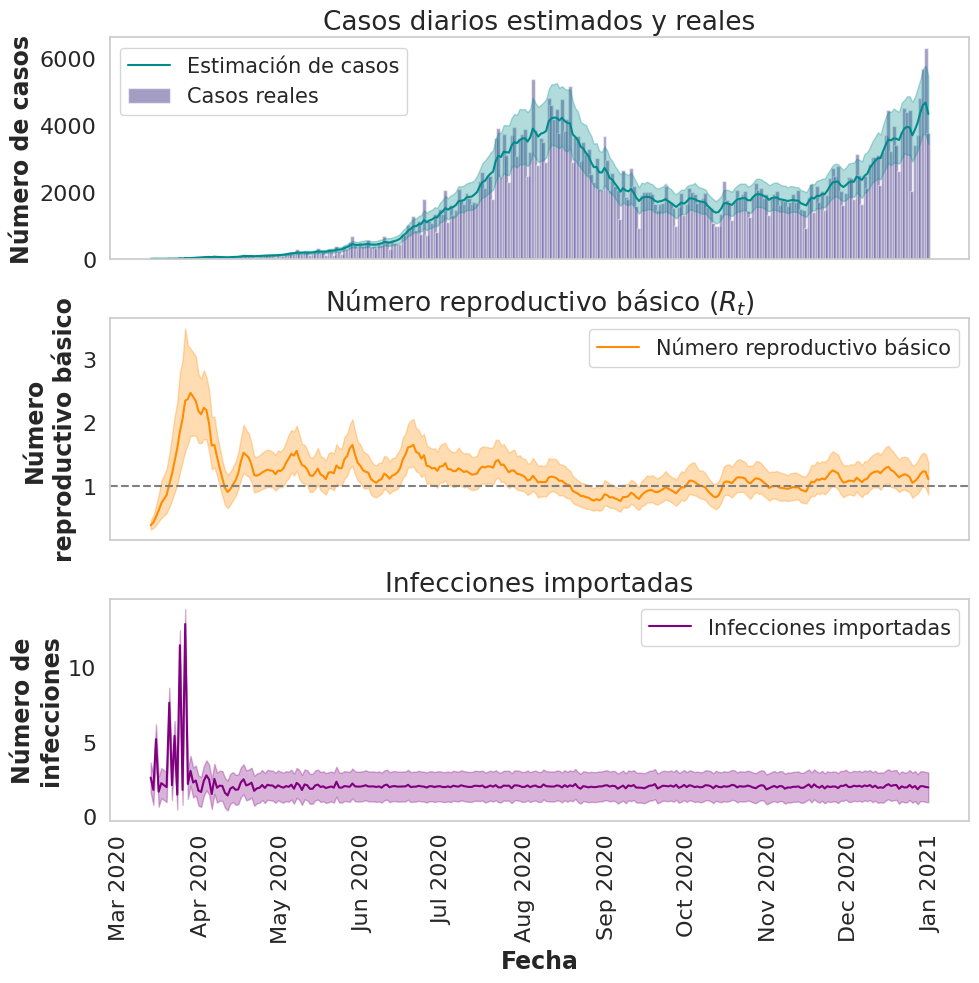

In [ ]:
# Convertir las variables de fecha a datetime
data['x'] = pd.to_datetime(data['x'])
data_2['x'] = pd.to_datetime(data_2['x'])
sns.set(style="whitegrid")

data = data[data['x'] <= '2020-12-31']
data_2 = data_2[data_2['x'] <= '2020-12-31']

# Configuración de la figura y los ejes
fig, axes = plt.subplots(3, 1, figsize=(10, 10), sharex=True)

# Función para formatear los miles con punto
def thousands_formatter(x, pos):
    return f'{int(x):,}'.replace(',', '.')

#DarkSlateBlue

# Gráfica de casos diarios con ajuste del ancho de las barras
axes[0].bar(data['x'], data['y_real'], color='DarkSlateBlue', alpha=0.5, width=1.5, label='Casos reales')
axes[0].plot(data['x'], data['y'], color='DarkCyan', label='Estimación de casos')
axes[0].fill_between(data['x'], data['yl'], data['yh'], color='DarkCyan', alpha=0.3)
axes[0].set_title('Casos diarios estimados y reales', fontsize=title_font)
axes[0].set_ylabel('Número de casos', fontsize=ylabel_font, fontweight='bold')
axes[0].legend(fontsize=legend_font)
# axes[0].yaxis.set_major_formatter(ticker.FuncFormatter(thousands_formatter))
axes[0].xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
axes[0].grid(False)

# Gráfica del número reproductivo básico
axes[1].plot(data['x'], data['Rt'], color='darkorange', label='Número reproductivo básico')
axes[1].fill_between(data['x'], data['Rtl'], data['Rth'], color='darkorange', alpha=0.3)
axes[1].axhline(1, color='grey', linestyle='--')
axes[1].set_title('Número reproductivo básico ($R_t$)', fontsize=title_font)
axes[1].set_ylabel('Número\nreproductivo básico', fontsize=ylabel_font, fontweight='bold')
axes[1].legend(fontsize=legend_font)
# axes[1].yaxis.set_major_formatter(ticker.FuncFormatter(thousands_formatter))
axes[1].xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
axes[1].grid(False)

# Gráfica de infecciones importadas
axes[2].plot(data_2['x'], data_2['ex'], color='purple', label='Infecciones importadas')
axes[2].fill_between(data_2['x'], data_2['ex'] - 1, data_2['ex'] + 1, color='purple', alpha=0.3)
axes[2].set_title('Infecciones importadas', fontsize=title_font)
axes[2].set_ylabel('Número de\ninfecciones', fontsize=ylabel_font, fontweight='bold')
axes[2].set_xlabel('Fecha', fontsize=ylabel_font, fontweight='bold')
axes[2].legend(fontsize=legend_font)
# axes[2].yaxis.set_major_formatter(ticker.FuncFormatter(thousands_formatter))
axes[2].xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
axes[2].grid(False)


# Ajustar a escala todas las gráficas
plt.gcf().autofmt_xdate()
plt.setp(axes[2].get_xticklabels(), rotation=90, ha='center', fontsize=ticks_font)
plt.tight_layout()


for ii in range (3):
    axes[ii].tick_params(axis='both', which='major', labelsize=ticks_font)

# Guardar las figuras en diferentes formatos
plt.savefig('Figura1.pdf') # Para que en LaTeX se vea en buena calidad
plt.savefig('Figura1.svg') # Imagen vectorizada, para editar y hacer cambios menores. Se puede editar con Inkscape



plt.show()